Project-1
Apply
logistic Regression
SVM
Decision Tree
RandomForest
on the Loan dataset and check were you will get the best possible accuracy
project note : Dependent Variable is Loan Status

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# get data_set 

In [52]:
df=pd.read_csv("loan (1).csv")

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
df.isnull().sum()
# we have null valuse but we will treat it by (tret with null value) bcoz we dont want loose 20% data 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
# Drop the Loan_ID column
df.drop('Loan_ID', axis=1, inplace=True)

In [57]:
# by using label encoder we transfer object data type into numeraical one 

In [58]:
object_col=(df.select_dtypes(include=['object']).columns)

In [59]:
object_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
# treating  all object col in loop for converting labelencoder 

In [62]:
# filling all obj null val with mode

for col in object_col:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [63]:
#by using LB 

label_encoder = LabelEncoder()
for col in object_col:
    df[col] = label_encoder.fit_transform(df[col])

In [64]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [65]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
# filling numerical value with mean & mode 

In [67]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)


In [68]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
# convert datatype into flot
df = df.astype(float)  


Apply
logistic Regression
SVM
Decision Tree
RandomForest

In [70]:
x=df.drop(["Loan_Status"],axis=1)  # independent var 

In [71]:
y=df["Loan_Status"]                 # depdendent var 

In [72]:
#split the data into train test split
from sklearn.model_selection import train_test_split 

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50) 

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc=accuracy_score(y_pred,y_test)

print(f"Accuracy from LR is :{acc}")

Accuracy from LR is :0.8373983739837398


C:\Users\Jayraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50) 
#create opbject of model 
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
ypred = dt.predict(x_test)
acc=accuracy_score(ypred,y_test)

print(f"Accuracy from DT is:{acc}")

Accuracy from DT is:0.7337662337662337


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=50) 
#create opbject of model 
cls = RandomForestClassifier(criterion='entropy', n_estimators = 150)
cls.fit(x_train,y_train)
ypred=cls.predict(x_test)
acc=accuracy_score(ypred,y_test)

print(f"Accuracy from RF is:{acc}")

Accuracy from RF is:0.7816901408450704


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40) 
#get the model 
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
ypred=svc.predict(x_test)
ypred=svc.predict(x_test)
acc=accuracy_score(ypred,y_test)
print(f"Accuracy from svm  is:{acc}")

Accuracy from svm  is:0.7142857142857143


Project-2

Apply Exploratory Data Analysis on the FifaDataset
Convert the appropriate columns to machine understandable columns using label encoding
Handle Null values
Apply the correlation and remove the column which are more than 60% correlated
Apply the variance and remove the columns whose variance is less that 20%
Understand the Dataset whether the dataset is corr

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('fifa_cleaned.csv')

In [3]:
data.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [ ]:
# Apply Exploratory Data Analysis on the FifaDataset

In [ ]:
# !pip install klib 

In [4]:
import klib  

In [ ]:
# klib.corr_plot(data)#n corr heatmap    # (numeric)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (50), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='short_passing', ylabel='Density'>

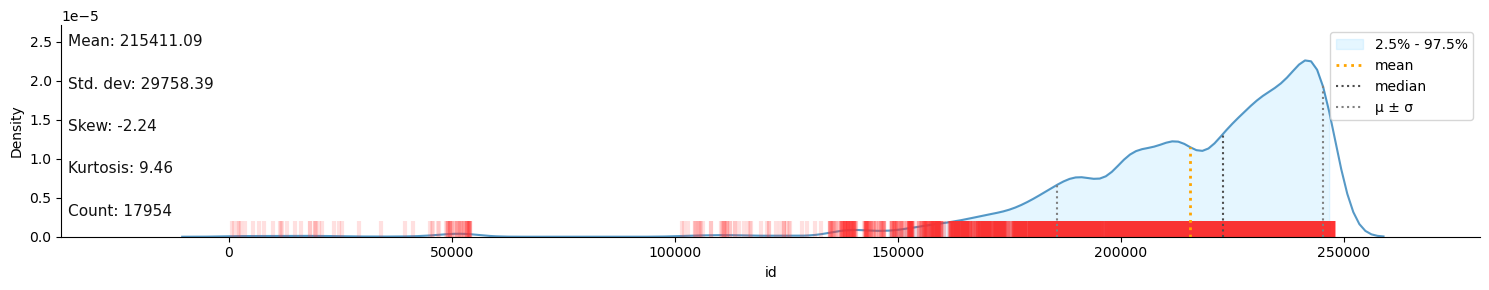

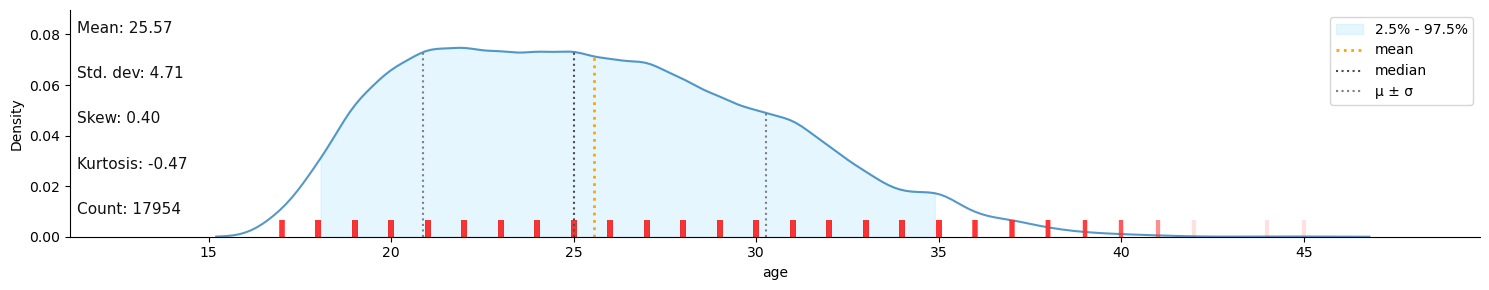

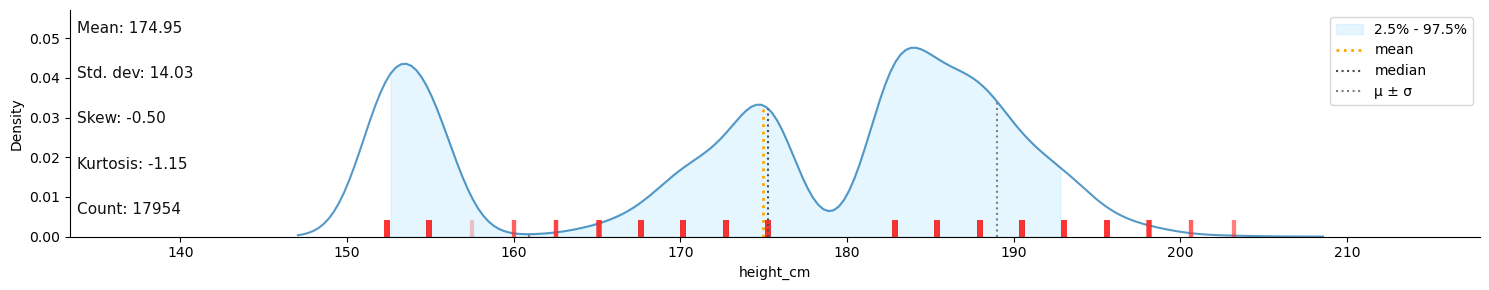

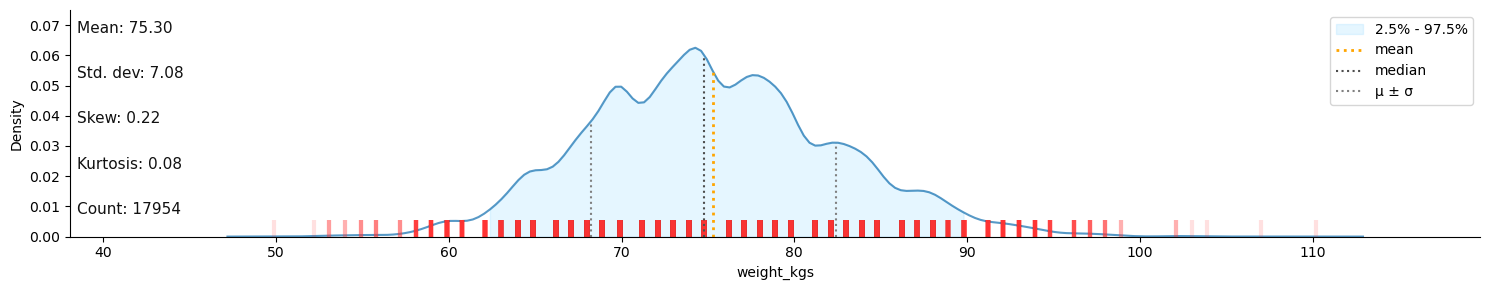

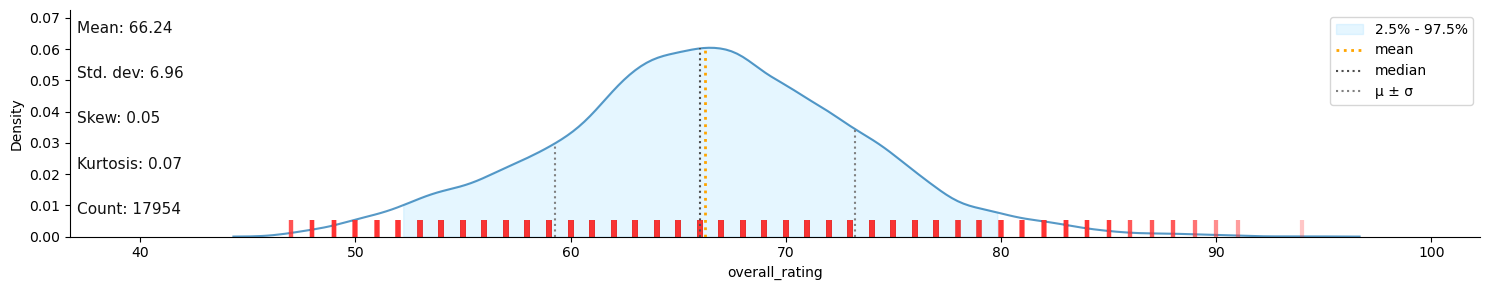

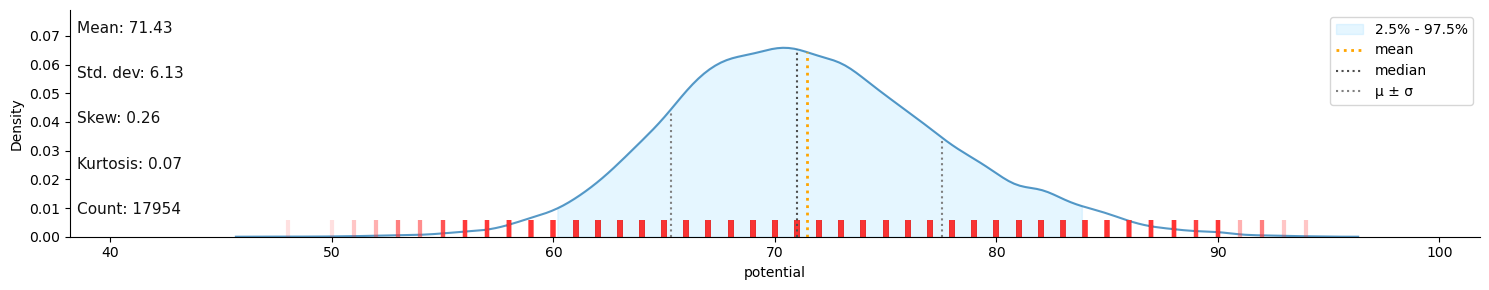

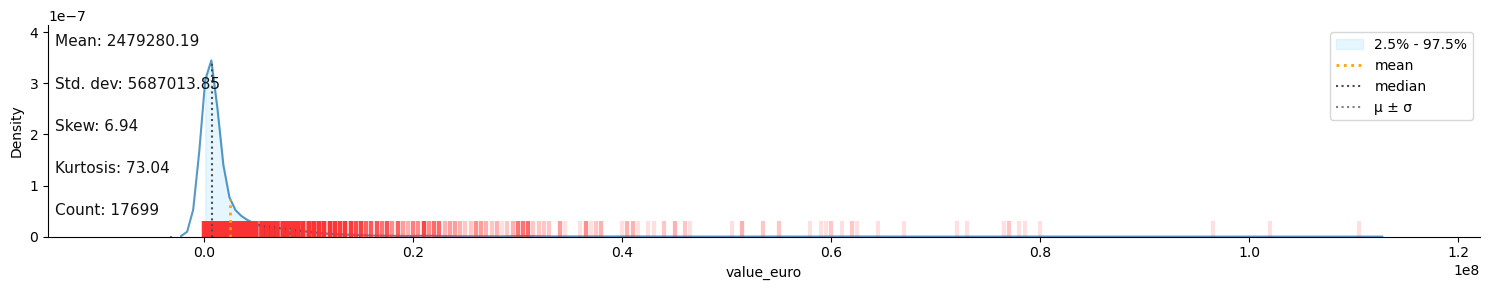

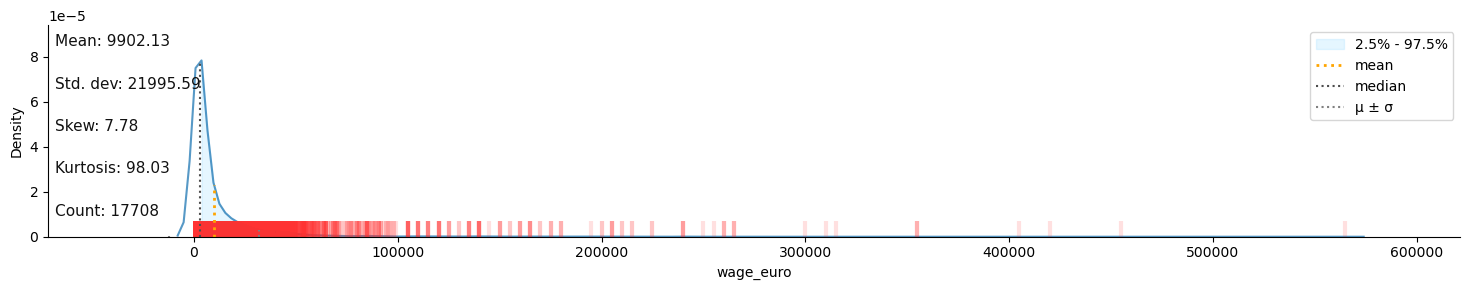

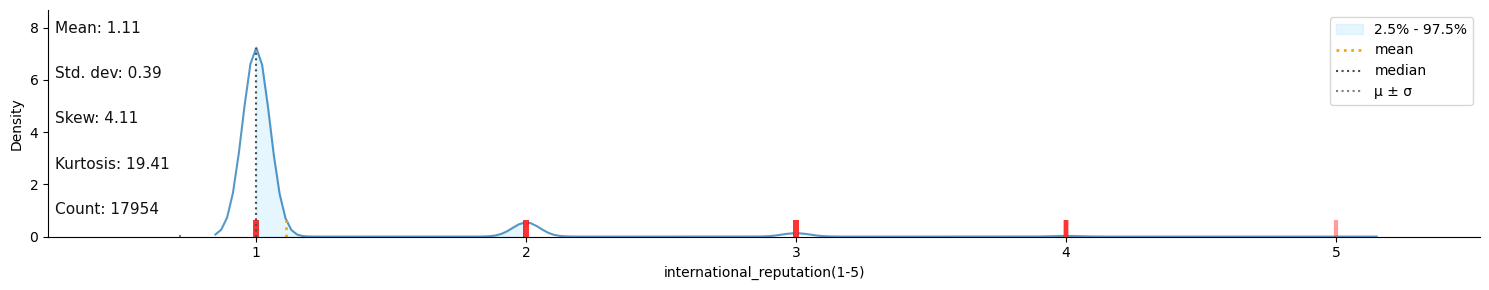

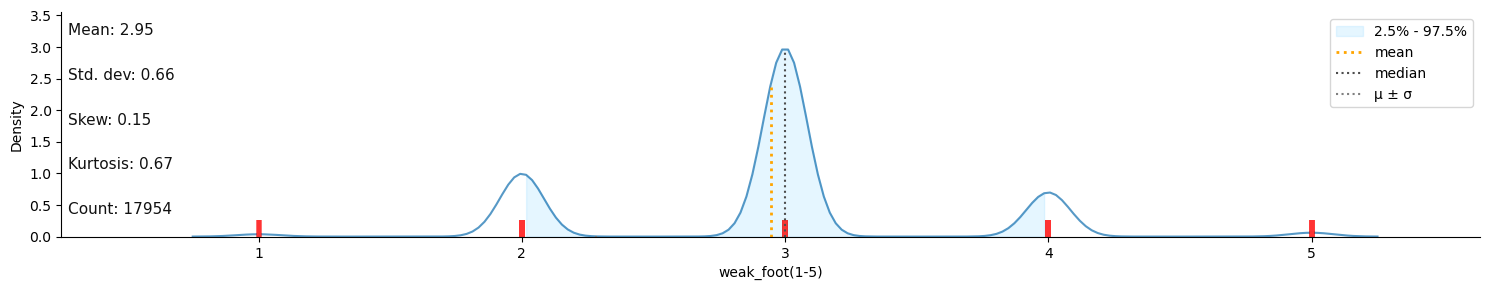

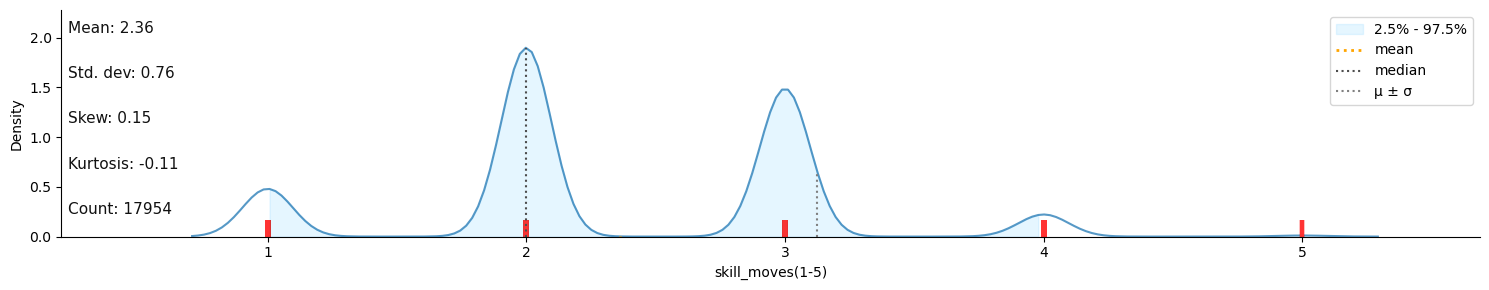

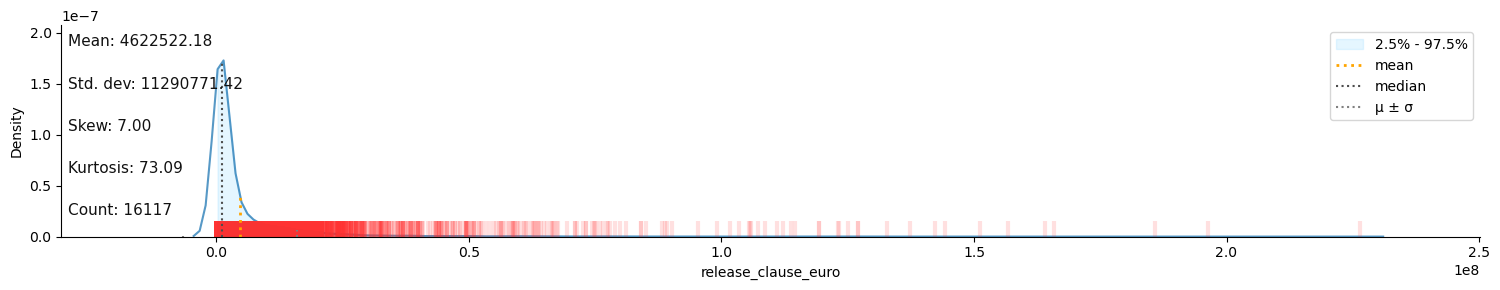

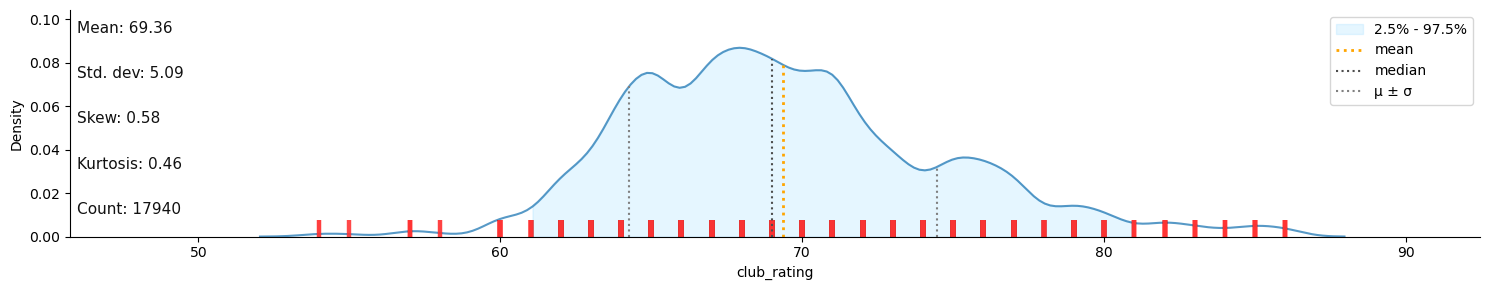

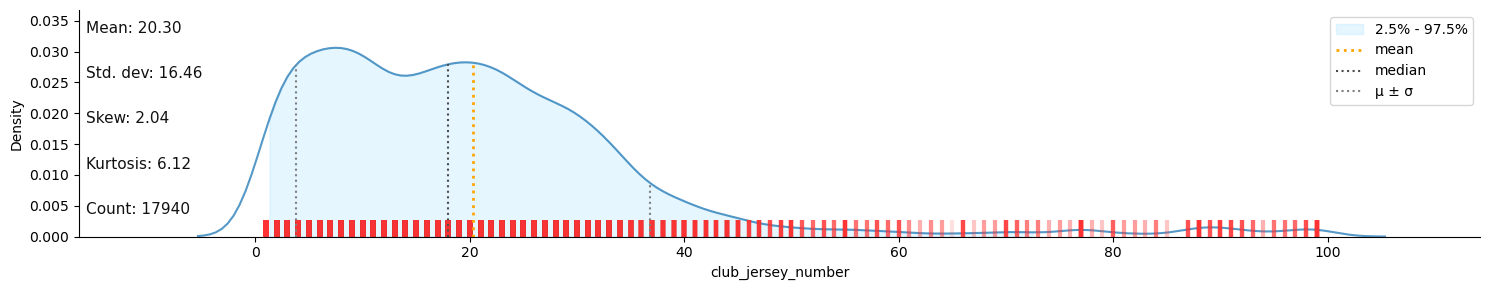

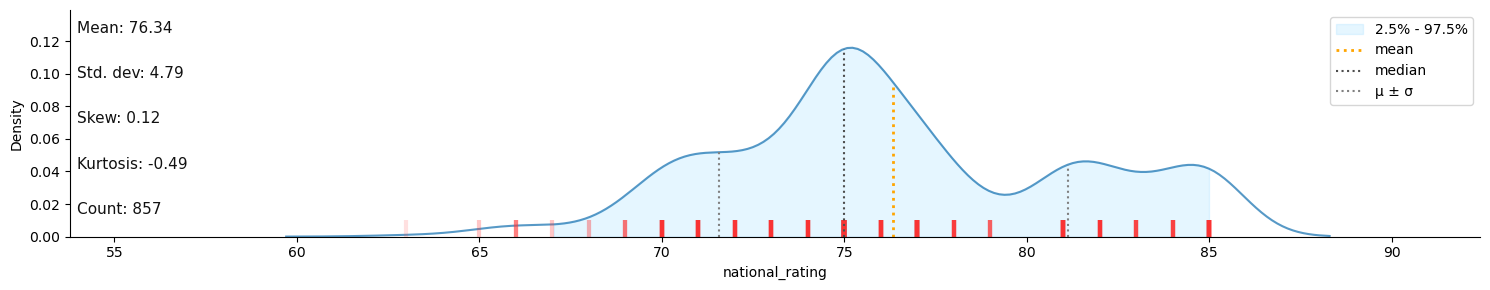

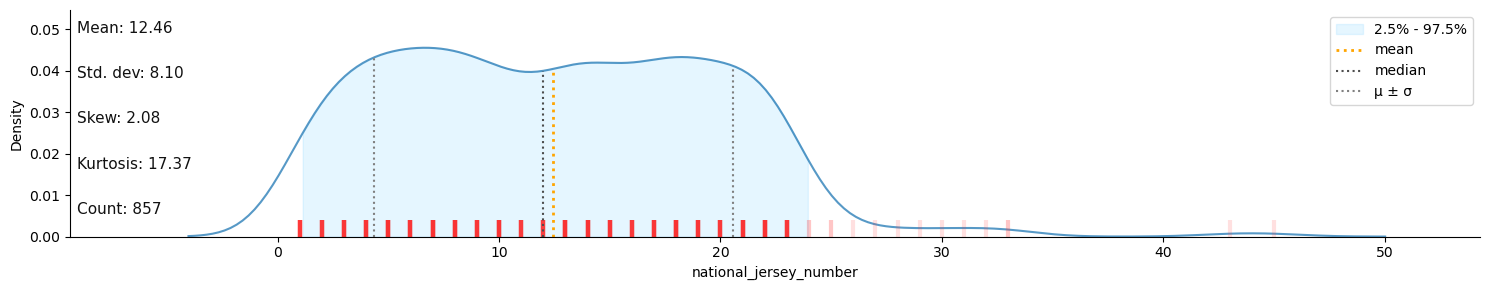

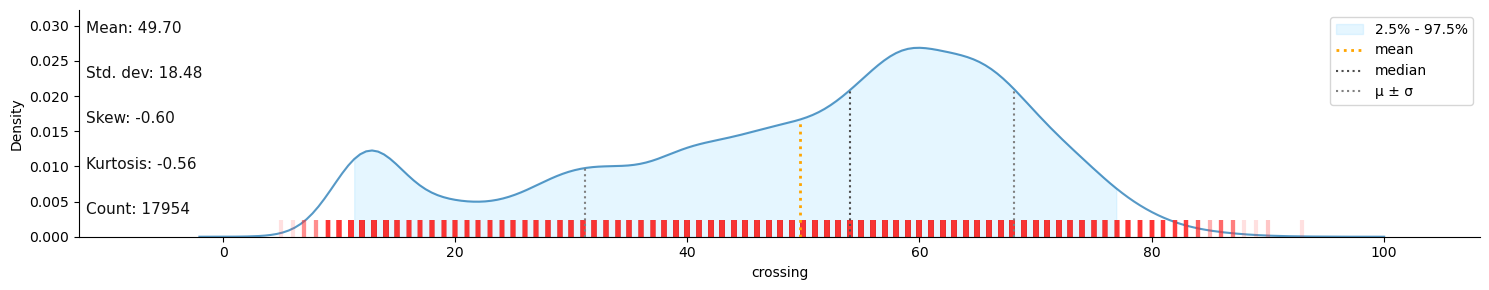

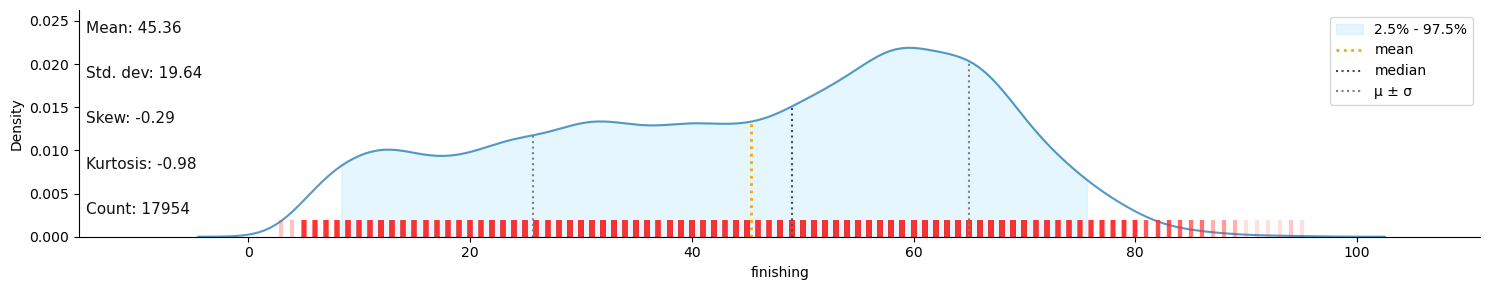

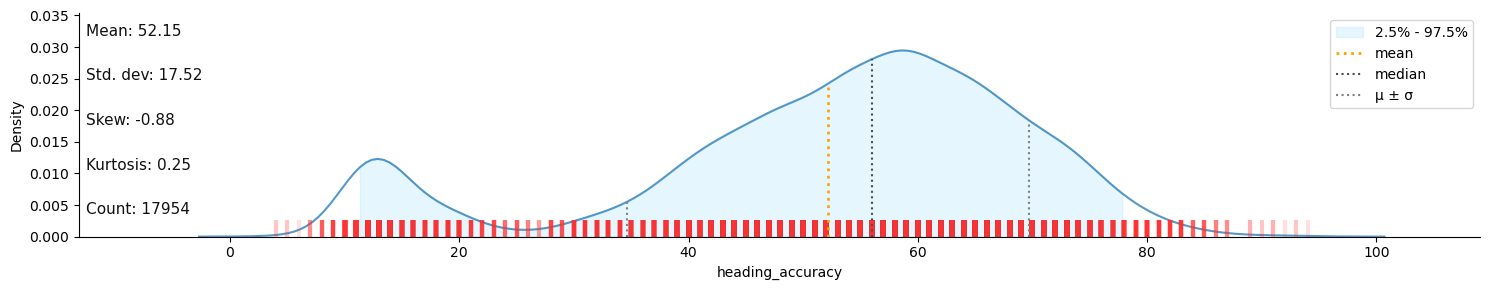

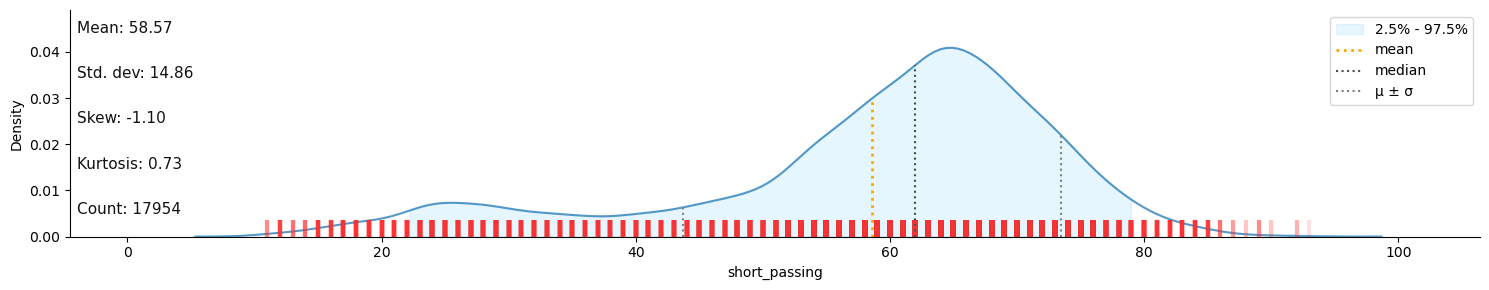

In [5]:
klib.dist_plot(data)  # retuurn distribution plot for every feature

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [ ]:
# remove notimportant col 

In [7]:
data.drop(['id','name', 'full_name', 'birth_date', 'club_team', 'club_position', 'club_jersey_number', 
           'club_join_date', 'contract_end_year', 'national_team', 'national_team_position',
           'national_jersey_number', 'tags', 'traits','nationality','national_rating'], axis=1, inplace=True)


In [8]:
data

,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,31,170.18,72.1,"CF,RW,ST",94,94,110500000.0,565000.0,Left,5,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,27,154.94,76.2,"CAM,RM,CM",88,89,69500000.0,205000.0,Right,3,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,25,190.50,83.9,"CM,CAM",88,91,73000000.0,255000.0,Right,4,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,27,162.56,59.0,"LW,ST",88,88,62000000.0,165000.0,Right,3,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,27,187.96,88.9,CB,88,91,60000000.0,135000.0,Right,3,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,"RM,CAM,CM",67,70,975000.0,3000.0,Right,1,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,23,182.88,79.8,LB,59,67,190000.0,1000.0,Left,1,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,22,185.42,89.8,GK,59,67,170000.0,1000.0,Right,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17952,21,175.26,64.9,"ST,LM",59,71,280000.0,4000.0,Right,1,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


In [9]:
object_col = list(data.select_dtypes(include=['object']).columns)

In [10]:
object_col           # object dtype col 

['positions',
 'preferred_foot',
 'work_rate',
 'body_type',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB']

In [ ]:
# by useing LabelEncode we will conver category col into numercal 

In [11]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [12]:
for col in object_col:
    data[col]=le.fit_transform(data[col].astype(str))
    


In [14]:
data.head()

,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,31,170.18,72.1,214,94,94,110500000.0,565000.0,0,5,...,53,48,48,48,53,45,30,30,30,45
1,27,154.94,76.2,72,88,89,69500000.0,205000.0,1,3,...,69,70,70,70,69,60,50,50,50,60
2,25,190.50,83.9,228,88,91,73000000.0,255000.0,1,4,...,79,82,82,82,79,77,81,81,81,77
3,27,162.56,59.0,549,88,88,62000000.0,165000.0,1,3,...,52,43,43,43,52,44,23,23,23,44
4,27,187.96,88.9,104,88,91,60000000.0,135000.0,1,3,...,73,82,82,82,73,81,106,106,106,81


In [ ]:
# Handle Null values

In [ ]:
# for i in data.isnull().sum():     <== cheacking null val
#     print(i)

In [15]:
# identify the columns with null values
null_columns = data.columns[data.isnull().any()]   # these will give us null col name 

In [16]:
null_columns

Index(['value_euro', 'wage_euro', 'release_clause_euro', 'club_rating'], dtype='object')

In [17]:
null_counts = data[null_columns].isnull().sum()    # these eill give how many vull value the col have 

In [18]:
null_counts

value_euro              255
wage_euro               246
release_clause_euro    1837
club_rating              14
dtype: int64

In [ ]:
# fill null value with mean/median/mode 

In [19]:
data['value_euro'].fillna(data['value_euro'].mean(), inplace=True)

data['wage_euro'].fillna(data['wage_euro'].mean(), inplace=True)

In [20]:
data['release_clause_euro'].fillna(data['release_clause_euro'].mean(),inplace=True)

In [21]:
data['club_rating'].fillna(data['club_rating'].mode()[0],inplace=True)  # bcz less valuse is present 

In [22]:
# convert datatype into flot
data= data.astype(float)  

In [ ]:
# Apply the variance and remove the columns whose variance is less that 20%

In [25]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.2)
X_sel= selector.fit(data)
X_sel

VarianceThreshold(threshold=0.2)

In [26]:
X_sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [27]:
Notuseful_columnNames = data.columns[X_sel.get_support() == False]

In [28]:
Notuseful_columnNames

Index(['preferred_foot', 'international_reputation(1-5)'], dtype='object')

In [29]:
data.drop(Notuseful_columnNames,axis =1, inplace =True)

In [ ]:
# Apply the correlation and remove the column which are more than 60% correlated

In [39]:
corr_matrix = data.corr() 

In [40]:
corr_matrix

,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,wage_euro,weak_foot(1-5),skill_moves(1-5),...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
age,1.000000,0.059579,0.233819,-0.042895,0.461529,-0.259579,0.081621,0.151531,0.061108,0.029681,...,0.255546,0.290173,0.290173,0.290173,0.255546,0.250715,0.275301,0.275301,0.275301,0.250715
height_cm,0.059579,1.000000,0.495320,-0.118971,0.038080,0.008526,0.011070,0.021136,-0.130464,-0.320141,...,0.186892,0.246214,0.246214,0.246214,0.186892,0.218290,0.313805,0.313805,0.313805,0.218290
weight_kgs,0.233819,0.495320,1.000000,-0.093319,0.150521,-0.015099,0.044217,0.061651,-0.128875,-0.353601,...,0.260315,0.339474,0.339474,0.339474,0.260315,0.296125,0.424348,0.424348,0.424348,0.296125
positions,-0.042895,-0.118971,-0.093319,1.000000,-0.014029,-0.017777,0.008380,0.013926,0.102888,0.204662,...,-0.293966,-0.379784,-0.379784,-0.379784,-0.293966,-0.355522,-0.440341,-0.440341,-0.440341,-0.355522
overall_rating,0.461529,0.038080,0.150521,-0.014029,1.000000,0.647249,0.627409,0.574453,0.216394,0.418718,...,0.335894,0.337769,0.337769,0.337769,0.335894,0.307331,0.254514,0.254514,0.254514,0.307331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LB,0.250715,0.218290,0.296125,-0.355522,0.307331,0.142017,0.175198,0.175581,-0.179550,-0.413321,...,0.989996,0.982629,0.982629,0.982629,0.989996,1.000000,0.958418,0.958418,0.958418,1.000000
LCB,0.275301,0.313805,0.424348,-0.440341,0.254514,0.082321,0.116912,0.131906,-0.225614,-0.514272,...,0.917678,0.959791,0.959791,0.959791,0.917678,0.958418,1.000000,1.000000,1.000000,0.958418
CB,0.275301,0.313805,0.424348,-0.440341,0.254514,0.082321,0.116912,0.131906,-0.225614,-0.514272,...,0.917678,0.959791,0.959791,0.959791,0.917678,0.958418,1.000000,1.000000,1.000000,0.958418
RCB,0.275301,0.313805,0.424348,-0.440341,0.254514,0.082321,0.116912,0.131906,-0.225614,-0.514272,...,0.917678,0.959791,0.959791,0.959791,0.917678,0.958418,1.000000,1.000000,1.000000,0.958418


In [37]:
import seaborn as sns

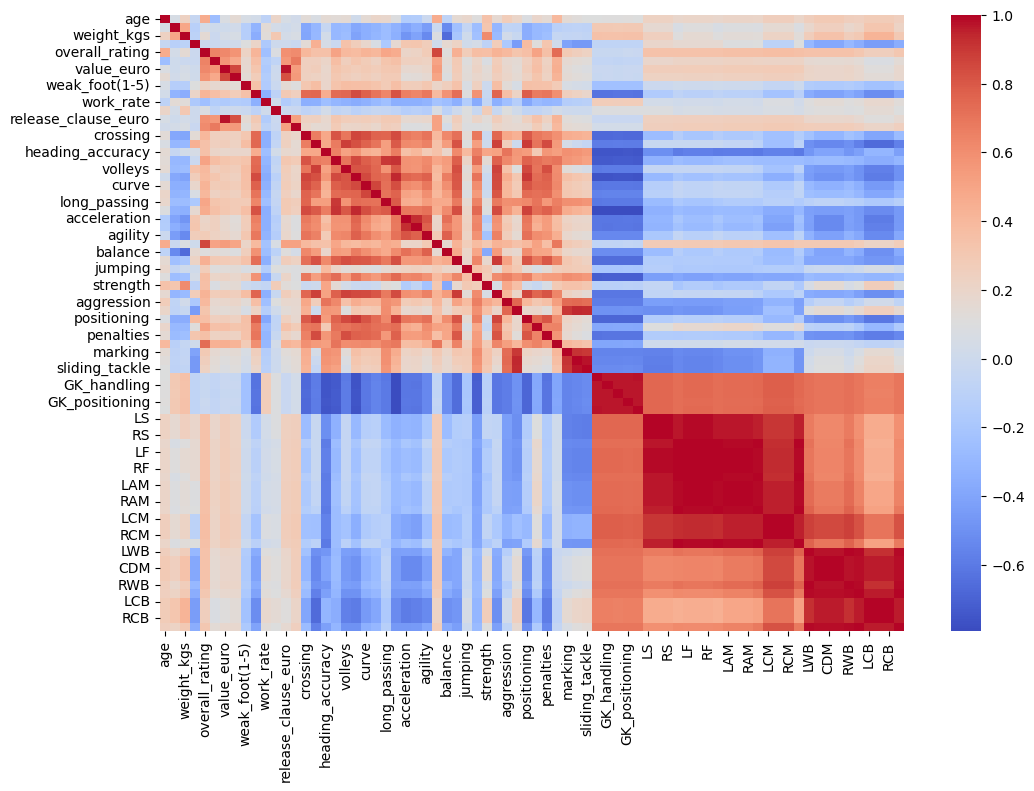

In [42]:
# Create a heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [44]:
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > 0.6:
#             print(corr_matrix.iloc[row][col])
            print(corr_matrix.columns[row])

potential
value_euro
wage_euro
release_clause_euro
release_clause_euro
club_rating
club_rating
crossing
finishing
finishing
short_passing
short_passing
short_passing
short_passing
volleys
volleys
volleys
volleys
dribbling
dribbling
dribbling
dribbling
dribbling
curve
curve
curve
curve
curve
curve
freekick_accuracy
freekick_accuracy
freekick_accuracy
freekick_accuracy
freekick_accuracy
freekick_accuracy
freekick_accuracy
long_passing
long_passing
long_passing
long_passing
long_passing
long_passing
ball_control
ball_control
ball_control
ball_control
ball_control
ball_control
ball_control
ball_control
ball_control
ball_control
acceleration
acceleration
acceleration
acceleration
acceleration
acceleration
sprint_speed
sprint_speed
sprint_speed
sprint_speed
sprint_speed
sprint_speed
agility
agility
agility
agility
agility
agility
agility
agility
agility
agility
reactions
balance
balance
balance
balance
balance
balance
balance
shot_power
shot_power
shot_power
shot_power
shot_power
shot_power


In [45]:
# to avoid repetation we use set()

corr_names = set()
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > 0.6:
            corr_names.add(corr_matrix.columns[row])

In [46]:
corr_names

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK_diving',
 'GK_handling',
 'GK_kicking',
 'GK_positioning',
 'GK_reflexes',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'acceleration',
 'aggression',
 'agility',
 'balance',
 'ball_control',
 'club_rating',
 'composure',
 'crossing',
 'curve',
 'dribbling',
 'finishing',
 'freekick_accuracy',
 'interceptions',
 'long_passing',
 'long_shots',
 'marking',
 'penalties',
 'positioning',
 'potential',
 'reactions',
 'release_clause_euro',
 'short_passing',
 'shot_power',
 'sliding_tackle',
 'sprint_speed',
 'stamina',
 'standing_tackle',
 'strength',
 'value_euro',
 'vision',
 'volleys',
 'wage_euro'}

In [48]:
data.head()

,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,wage_euro,weak_foot(1-5),skill_moves(1-5),...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,31.0,170.18,72.1,214.0,94.0,94.0,110500000.0,565000.0,4.0,4.0,...,53.0,48.0,48.0,48.0,53.0,45.0,30.0,30.0,30.0,45.0
1,27.0,154.94,76.2,72.0,88.0,89.0,69500000.0,205000.0,5.0,4.0,...,69.0,70.0,70.0,70.0,69.0,60.0,50.0,50.0,50.0,60.0
2,25.0,190.50,83.9,228.0,88.0,91.0,73000000.0,255000.0,4.0,5.0,...,79.0,82.0,82.0,82.0,79.0,77.0,81.0,81.0,81.0,77.0
3,27.0,162.56,59.0,549.0,88.0,88.0,62000000.0,165000.0,4.0,4.0,...,52.0,43.0,43.0,43.0,52.0,44.0,23.0,23.0,23.0,44.0
4,27.0,187.96,88.9,104.0,88.0,91.0,60000000.0,135000.0,3.0,2.0,...,73.0,82.0,82.0,82.0,73.0,81.0,106.0,106.0,106.0,81.0


In [49]:
#delete unwanted col 
data.drop(corr_names,axis = 1, inplace=True)  

### after applying corr we left with 11 col 

In [50]:
data # after applying corr we left with 11 col 

,age,height_cm,weight_kgs,positions,overall_rating,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,heading_accuracy,jumping
0,31.0,170.18,72.1,214.0,94.0,4.0,4.0,7.0,4.0,70.0,68.0
1,27.0,154.94,76.2,72.0,88.0,5.0,4.0,2.0,3.0,52.0,50.0
2,25.0,190.50,83.9,228.0,88.0,4.0,5.0,2.0,6.0,75.0,83.0
3,27.0,162.56,59.0,549.0,88.0,4.0,4.0,2.0,6.0,56.0,53.0
4,27.0,187.96,88.9,104.0,88.0,3.0,2.0,0.0,6.0,83.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...
17949,25.0,175.26,74.8,648.0,67.0,3.0,3.0,2.0,6.0,60.0,77.0
17950,23.0,182.88,79.8,328.0,59.0,3.0,2.0,6.0,6.0,53.0,74.0
17951,22.0,185.42,89.8,327.0,59.0,1.0,1.0,8.0,6.0,13.0,43.0
17952,21.0,175.26,64.9,845.0,59.0,4.0,3.0,7.0,3.0,55.0,58.0
